# Investment Assignment

#### Data Frame Info:
1. companies : raw data from companies.csv
2. rounds2 : raw data from rounds.csv
3. master_frame : merged data b/w rounds and companies
4. shortlisted_funding_frame : dataframe from selected funding rounds (i.e ventures,private equity, angel and seed)
5. finalised_funding_frame : dataframe with finalised funding type
6. mapping: raw data from mapping.csv
7. sector_merged_frame: dataframe with main sector data populated

In [170]:
## import all required packages
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Checkpoint 1: Data Cleaning 1
Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively

In [171]:
## Load companies.csv and rounds2.csv into respective df
companies=pd.read_csv('companies.csv')
rounds2=pd.read_csv('rounds2.csv')

#### Companies Metadata
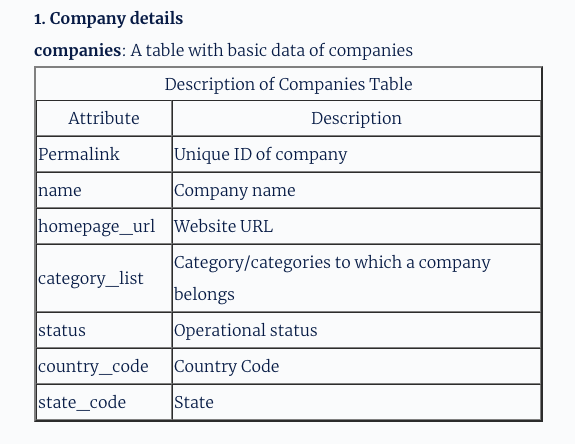
#### Rounds2 Metadata
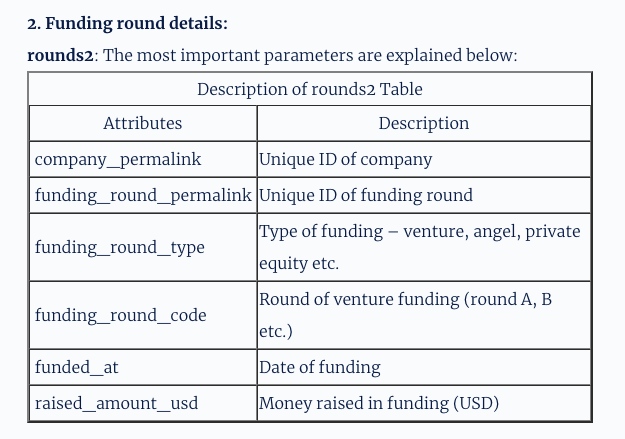

In [172]:
## check the info for both the df
companies.info()
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2  

In [173]:
## check for null counts in companies data
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [174]:
## check for null counts in rounds2 data
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [175]:
## Standardize the case and type of columns in companies df and rounds2 df
companies["permalink"]=companies["permalink"].apply(lambda x:str(x.lower()))
rounds2["company_permalink"]=rounds2["company_permalink"].apply(lambda x:str(x.lower()))
companies["permalink"]=companies["permalink"].astype("string")
companies["name"]=companies["name"].astype("string")
companies["homepage_url"]=companies["homepage_url"].astype("string")
companies["category_list"]=companies["category_list"].astype("string")
companies["status"]=companies["status"].astype("string")
companies["country_code"]=companies["country_code"].astype("string")
companies["state_code"]=companies["state_code"].astype("string")
companies["region"]=companies["region"].astype("string")
companies["city"]=companies["city"].astype("string")
rounds2["company_permalink"]=rounds2["company_permalink"].astype("string")
rounds2["funding_round_permalink"]=rounds2["funding_round_permalink"].astype("string")
rounds2["funding_round_type"]=rounds2["funding_round_type"].astype("string")
rounds2["funding_round_code"]=rounds2["funding_round_code"].astype("string")

#### How many unique companies are present in companies?

In [176]:
len(companies["permalink"].unique())

66368

#### How many unique companies are present in rounds?

In [177]:
len(rounds2["company_permalink"].unique())

66373

#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. 


In [178]:
master_frame=pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink',how='left')

In [179]:
## check null records in master_frame data
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                     40
name                          41
homepage_url                6170
category_list               3437
status                        40
country_code                8694
state_code                 10960
region                     10183
city                       10180
founded_at                 20542
dtype: int64

#### Are there any companies in the rounds2 file which are not present in companies?

In [180]:
master_frame[master_frame.permalink.isnull()]["company_permalink"].sort_values(ascending=True)

3291                  /organization/affluent-attaché-club-2
8097                             /organization/asiansbook�
14311               /organization/boréal-bikes-incorporated
14951                          /organization/bricoprivé-com
16839                                  /organization/capptú
24933                           /organization/crème-ciseaux
29597                                /organization/e-cêbica
31863              /organization/energystone-games-ǁ�ǟ�ƹ�ƈ�
33069                               /organization/etool-io
42221                        /organization/gráfica-en-línea
45176                       /organization/huizuche-com-惠��车
46281                     /organization/ignia-bienes-raíces
49466                              /organization/inveno-英威诺
49468                              /organization/inveno-英威诺
49945     /organization/iproof---the-foundation-for-the-...
50517                      /organization/it�s-all-about-me
51001                      /organization

In [181]:
## master frame where funding round code is not missing
master_frame[~(master_frame.funding_round_code.isna())]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,<NA>,<NA>,<NA>,<NA>,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007
114941,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.0,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN


### Checkpoint 2: Funding Type Analysis

In [182]:
## different status types
master_frame.status.value_counts()

operating    90125
acquired     11744
closed        8714
ipo           4326
Name: status, dtype: Int64

In [183]:
### different funding_round_type
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: Int64

#### dataframe with filtered data for funding round type - venture, seed, angel and private_equity

In [184]:
shortlisted_funding_frame=master_frame[master_frame.funding_round_type.isin(["venture","seed","angel","private_equity"])]

In [185]:
## check null records status in shortlisted funding 
print(shortlisted_funding_frame.shape)
print(shortlisted_funding_frame.isnull().sum())

(94397, 16)
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         63277
funded_at                      0
raised_amount_usd          13770
permalink                     29
name                          30
homepage_url                4170
category_list               2515
status                        29
country_code                7328
state_code                  9285
region                      8566
city                        8563
founded_at                 16737
dtype: int64


In [186]:
## remove the records where raised_amount is null
shortlisted_funding_frame=shortlisted_funding_frame[~(shortlisted_funding_frame.raised_amount_usd.isnull())]
print(shortlisted_funding_frame.shape)
print(shortlisted_funding_frame.isnull().sum())

(80627, 16)
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         52474
funded_at                      0
raised_amount_usd              0
permalink                     14
name                          15
homepage_url                3458
category_list                867
status                        14
country_code                5027
state_code                  6577
region                      6069
city                        6066
founded_at                 13453
dtype: int64


In [187]:
## Describing the stats for amount raised
shortlisted_funding_frame.raised_amount_usd.describe()

count    8.062700e+04
mean     9.347995e+06
std      7.562940e+07
min      0.000000e+00
25%      4.000000e+05
50%      2.000000e+06
75%      7.975496e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

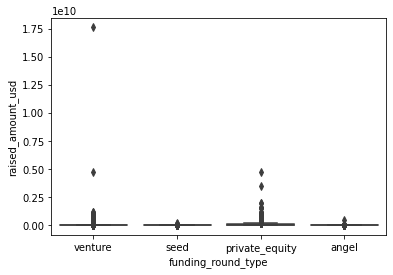

In [188]:
### bar chat plot to identify the outliers
sns.boxplot(data=shortlisted_funding_frame,x='funding_round_type',y='raised_amount_usd')
plt.show()

#### raised amount for different funding types in different rounds

In [189]:
pd.pivot_table(data=shortlisted_funding_frame,index="funding_round_type",columns=["funding_round_code"],values="raised_amount_usd",aggfunc='median',fill_value=0)

funding_round_code,A,B,C,D,E,F,G,H
funding_round_type,,,,,,,,
angel,1306921.0,0,0,0,0,0,0,0
private_equity,32950586.5,0,25000000,0,0,0,0,50000000
seed,2000000.0,1500000,925000,0,0,0,0,0
venture,4200000.0,10000000,14800000,18000000,20000000,25000000,26000000,40000000


#### raised amount for different funding types

In [190]:
pd.pivot_table(data=shortlisted_funding_frame,index="funding_round_type",values="raised_amount_usd",aggfunc='median')

,raised_amount_usd
funding_round_type,
angel,400000.0
private_equity,20000000.0
seed,275000.0
venture,5000000.0


### Checkpoint 3: Country Analysis

In [191]:
## DataFrame with Shortlisted Investment Type
finalised_funding_frame=shortlisted_funding_frame[master_frame.funding_round_type.isin(["venture"])]

In [192]:
## datype correction for date columns
finalised_funding_frame['founded_at'] = pd.to_datetime(finalised_funding_frame['founded_at'])
finalised_funding_frame['funded_at'] = pd.to_datetime(finalised_funding_frame['funded_at'])

#### top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [193]:
top9=pd.pivot_table(data=finalised_funding_frame,index="country_code",columns="funding_round_type",values="raised_amount_usd",aggfunc='sum').sort_values(by='venture',ascending=False).head(9)

<AxesSubplot:xlabel='country_code', ylabel='venture'>

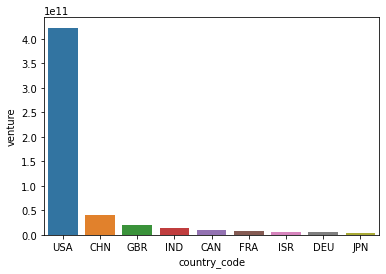

In [194]:
sns.barplot(data=top9,x=top9.index,y="venture",estimator=sum)

### Checkpoint 4: Sector Analysis 1

#### add new column primary_sector with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

In [195]:
finalised_funding_frame["category_list"].fillna("None",inplace=True)
finalised_funding_frame["primary_sector"]=finalised_funding_frame["category_list"].apply(lambda x:(x.split('|')[0]) if x is not None else x)

In [196]:
## read mapping sector file and impute null values in category list column with default value
mapping=pd.read_csv("mapping.csv",encoding='UTF-8')
mapping["category_list"]=mapping["category_list"].astype("string")
mapping["category_list"].fillna("None",inplace=True)
mapping.set_index("category_list",inplace=True)
mapping

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,,
None,0,1,0,0,0,0,0,0,0
3D,0,0,0,0,0,1,0,0,0
3D Printing,0,0,0,0,0,1,0,0,0
3D Technology,0,0,0,0,0,1,0,0,0
Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
Wholesale,0,0,0,0,0,0,0,1,0
Wine And Spirits,0,0,0,1,0,0,0,0,0
Wireless,0,0,0,1,0,0,0,0,0


#### Function to unpivot mapping data

In [197]:
def unPivot(pivot_df):
    df_dict = dict(list(pivot_df.groupby(pivot_df.index)))
    mapp=[[key,value.columns[(value == 1).any()].to_list()] for key, value in df_dict.items() if len(value.columns[(value == 1).any()]) > 0]
    df=DataFrame(mapp,columns=['primary_sector','main_sector'])
    df["main_sector"]=df["main_sector"].apply(lambda x: ' '.join([str(elem) for elem in x]))
    return df

In [198]:
## unpivotting mapping data and displaying 10 records
unpivot_mapping_df=unPivot(mapping)
unpivot_mapping_df.head(10)

,primary_sector,main_sector
0,0notechnology,Cleantech / Semiconductors
1,0tural Language Processing,Cleantech / Semiconductors
2,0tural Resources,Cleantech / Semiconductors
3,0vigation,"News, Search and Messaging"
4,3D,Manufacturing
5,3D Printing,Manufacturing
6,3D Technology,Manufacturing
7,A0lytics,"Social, Finance, Analytics, Advertising"
8,Accounting,"Social, Finance, Analytics, Advertising"
9,Active Lifestyle,Health


In [199]:
## data cleaning on the primary sector name having '0' instead of 'Na' or 'na' depending upon position 
unpivot_mapping_df["primary_sector"]=unpivot_mapping_df["primary_sector"].apply(lambda x: (x if (x=='Enterprise 2.0') else (x.replace("0","Na") if (x.find("0")==0 & (x !='Enterprise 2.0')) else x.replace("0","na"))))
unpivot_mapping_df["primary_sector"]=unpivot_mapping_df["primary_sector"].apply(lambda x: x.replace("Enterprise 2.na","Enterprise 2.0") if (x=='Enterprise 2.0') else x)
unpivot_mapping_df.head(10)

,primary_sector,main_sector
0,Nanotechnology,Cleantech / Semiconductors
1,Natural Language Processing,Cleantech / Semiconductors
2,Natural Resources,Cleantech / Semiconductors
3,Navigation,"News, Search and Messaging"
4,3D,Manufacturing
5,3D Printing,Manufacturing
6,3D Technology,Manufacturing
7,Analytics,"Social, Finance, Analytics, Advertising"
8,Accounting,"Social, Finance, Analytics, Advertising"
9,Active Lifestyle,Health


#### Joining Sector Data to Funding Frame dataset to create Sector Merged Frame

In [200]:
sector_merged_frame=pd.merge(finalised_funding_frame, unpivot_mapping_df, left_on='primary_sector', right_on='primary_sector',how='left')
sector_merged_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 50227
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_permalink        50228 non-null  string        
 1   funding_round_permalink  50228 non-null  string        
 2   funding_round_type       50228 non-null  string        
 3   funding_round_code       28043 non-null  string        
 4   funded_at                50228 non-null  datetime64[ns]
 5   raised_amount_usd        50228 non-null  float64       
 6   permalink                50226 non-null  string        
 7   name                     50226 non-null  string        
 8   homepage_url             47618 non-null  string        
 9   category_list            50228 non-null  string        
 10  status                   50226 non-null  string        
 11  country_code             48110 non-null  string        
 12  state_code               47367 n

### Checkpoint 5: Sector Analysis 2
Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries

In [201]:
D=sector_merged_frame[(sector_merged_frame.raised_amount_usd >=5000000) & (sector_merged_frame.raised_amount_usd <=15000000)]
D1=sector_merged_frame[(sector_merged_frame.country_code=='USA') & (sector_merged_frame.raised_amount_usd >=5000000) & (sector_merged_frame.raised_amount_usd <=15000000)]
D2=sector_merged_frame[(sector_merged_frame.country_code=='GBR') & (sector_merged_frame.raised_amount_usd >=5000000) & (sector_merged_frame.raised_amount_usd <=15000000)]
D3=sector_merged_frame[(sector_merged_frame.country_code=='IND') & (sector_merged_frame.raised_amount_usd >=5000000) & (sector_merged_frame.raised_amount_usd <=15000000)]

In [202]:
print('D(All Countries within Funding Limit) Investment Count:',D.shape)
print('D1(USA) Investment Count:', D1.shape)
print('D2(UK) Investment Count:', D2.shape)
print('D3(India) Investment Count:', D3.shape)

D(All Countries within Funding Limit) Investment Count: (16598, 18)
D1(USA) Investment Count: (12150, 18)
D2(UK) Investment Count: (628, 18)
D3(India) Investment Count: (330, 18)


#### D1(USA) - Investment by Sector - Top3

In [203]:
print('D1 Total Investment:',D1.raised_amount_usd.sum())
print('D1 Sector Wise Break:')
pd.pivot_table(data=D1,index='main_sector',values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False).head(3)

D1 Total Investment: 108531347515.0
D1 Sector Wise Break:


,raised_amount_usd
main_sector,
Others,2.632101e+10
"Social, Finance, Analytics, Advertising",2.380738e+10
Cleantech / Semiconductors,2.163343e+10


#### D2(UK) - Investment by Sector - Top3 

In [204]:
print('D2 Total Investment:',D2.raised_amount_usd.sum())
print('D2 Sector Wise Break:')
pd.pivot_table(data=D2,index='main_sector',values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False).head(3)

D2 Total Investment: 5436843539.0
D2 Sector Wise Break:


,raised_amount_usd
main_sector,
Others,1.283624e+09
Cleantech / Semiconductors,1.163990e+09
"Social, Finance, Analytics, Advertising",1.089404e+09


#### D3(IND) - Investment by Sector - Top3

In [205]:
print('D3 Total Investment:',D3.raised_amount_usd.sum())
print('D3 Sector Wise Break:')
pd.pivot_table(data=D3,index=['main_sector'],values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False).head(3)

D3 Total Investment: 2976543602.0
D3 Sector Wise Break:


,raised_amount_usd
main_sector,
Others,1.013410e+09
"Social, Finance, Analytics, Advertising",5.505496e+08
"News, Search and Messaging",4.338345e+08


#### D1(USA) - Number of investments in the each sector - Top3

In [206]:
pd.pivot_table(data=D1,index=['main_sector'],values='raised_amount_usd',aggfunc='count').sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd
main_sector,
Others,2950
"Social, Finance, Analytics, Advertising",2714
Cleantech / Semiconductors,2350


#### D2(UK) - Number of investments in the each sector - Top3

In [207]:
pd.pivot_table(data=D2,index=['main_sector'],values='raised_amount_usd',aggfunc='count').sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd
main_sector,
Others,147
"Social, Finance, Analytics, Advertising",133
Cleantech / Semiconductors,130


#### D3(IND) - Number of investments in the each sector - Top3

In [208]:
pd.pivot_table(data=D3,index=['main_sector'],values='raised_amount_usd',aggfunc='count').sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd
main_sector,
Others,110
"Social, Finance, Analytics, Advertising",60
"News, Search and Messaging",52


#### D1(USA) - For the top sector count-wise, which company received the highest investment - Top3

In [209]:
pd.pivot_table(data=D1[D1.main_sector=="Others"],index='name',values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd
name,
Virtustream,64300000.0
Capella Photonics,54968051.0
AirTight Networks,54201907.0


#### D2(UK) - For the top sector count-wise, which company received the highest investment - Top3

In [210]:
pd.pivot_table(data=D2[D2.main_sector=="Others"],index='name',values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd
name,
Electric Cloud,37000000.0
SenSage,36250000.0
Enigmatec,32500000.0


#### D3(IND) - For the top sector count-wise, which company received the highest investment

In [211]:
pd.pivot_table(data=D3[D3.main_sector=="Others"],index='name',values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd
name,
FirstCry.com,39000000.0
Myntra,38000000.0
CommonFloor,32900000.0


#### D1(USA) - For the second sector count-wise, which company received the highest investment - Top3

In [212]:
pd.pivot_table(data=D1[D1.main_sector=="Social, Finance, Analytics, Advertising"],index='name',values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
name,
SST Inc. (Formerly ShotSpotter),67933006.0
Demandbase,63000000.0
Intacct,61800000.0
NetBase Solutions,60600000.0
Lotame,59700000.0
...,...
Bulldog Solutions,5000000.0
Fundly,5000000.0
Thredhq,5000000.0


#### D2(UK) - For the second sector count-wise, which company received the highest investment - Top3

In [213]:
pd.pivot_table(data=D2[D2.main_sector=="Social, Finance, Analytics, Advertising"],index='name',values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd
name,
Celltick Technologies,37500000.0
myThings,34000000.0
Zopa,32900000.0


#### D3(IND) - For the second sector count-wise, which company received the highest investment - Top3

In [214]:
pd.pivot_table(data=D3[D3.main_sector=="Social, Finance, Analytics, Advertising"],index='name',values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd
name,
Manthan Systems,50700000.0
Komli Media,28000000.0
ShopClues.com,25000000.0


### Checkpoint 6: Plots

#### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.  

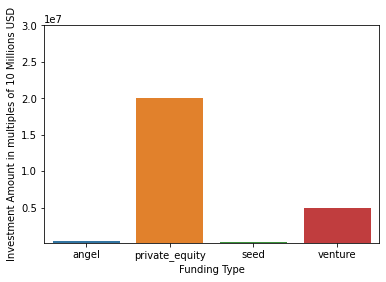

In [215]:
recommended_ft=pd.pivot_table(data=shortlisted_funding_frame,index="funding_round_type",values="raised_amount_usd",aggfunc='median')
ax=sns.barplot(data=recommended_ft,x=recommended_ft.index,y="raised_amount_usd",estimator=sum)
plt.ylim(200000,30000000)
ax.set(ylabel='Investment Amount in multiples of 10 Millions USD', xlabel='Funding Type')
plt.show()

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear. 

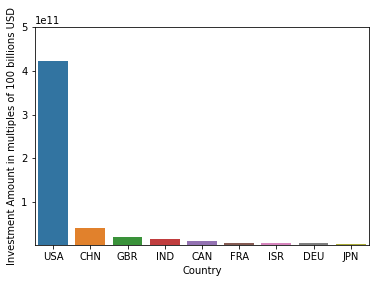

In [216]:
ax=sns.barplot(data=top9,x=top9.index,y="venture",estimator=sum)
plt.ylim(2000000000,500000000000)
ax.set(ylabel='Investment Amount in multiples of 100 billions USD', xlabel='Country')
plt.show()

#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [217]:
sectors_country_wise_frame = D[D.country_code.isin(["USA","IND","GBR"])].groupby(['country_code', 'main_sector']).agg({'raised_amount_usd':'count'}).reset_index()
sectors_country_wise_frame = sectors_country_wise_frame.groupby(['country_code']).apply(lambda x: x.sort_values(['raised_amount_usd'],ascending = False)).reset_index(drop = True)
top3_sectors_country_wise=sectors_country_wise_frame.groupby(['country_code']).head(3).reset_index(drop=True)

In [218]:
top3_sectors_country_wise

,country_code,main_sector,raised_amount_usd
0,GBR,Others,147
1,GBR,"Social, Finance, Analytics, Advertising",133
2,GBR,Cleantech / Semiconductors,130
3,IND,Others,110
4,IND,"Social, Finance, Analytics, Advertising",60
5,IND,"News, Search and Messaging",52
6,USA,Others,2950
7,USA,"Social, Finance, Analytics, Advertising",2714
8,USA,Cleantech / Semiconductors,2350


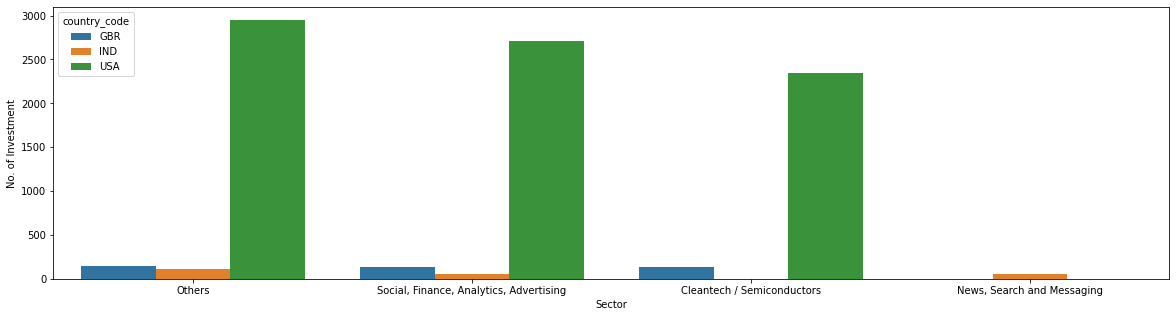

In [219]:
plt.figure(figsize=[20,5])
ax=sns.barplot(y="raised_amount_usd", x="main_sector", hue="country_code", data=top3_sectors_country_wise)
ax.set(ylabel='No. of Investment', xlabel='Sector')
plt.show()